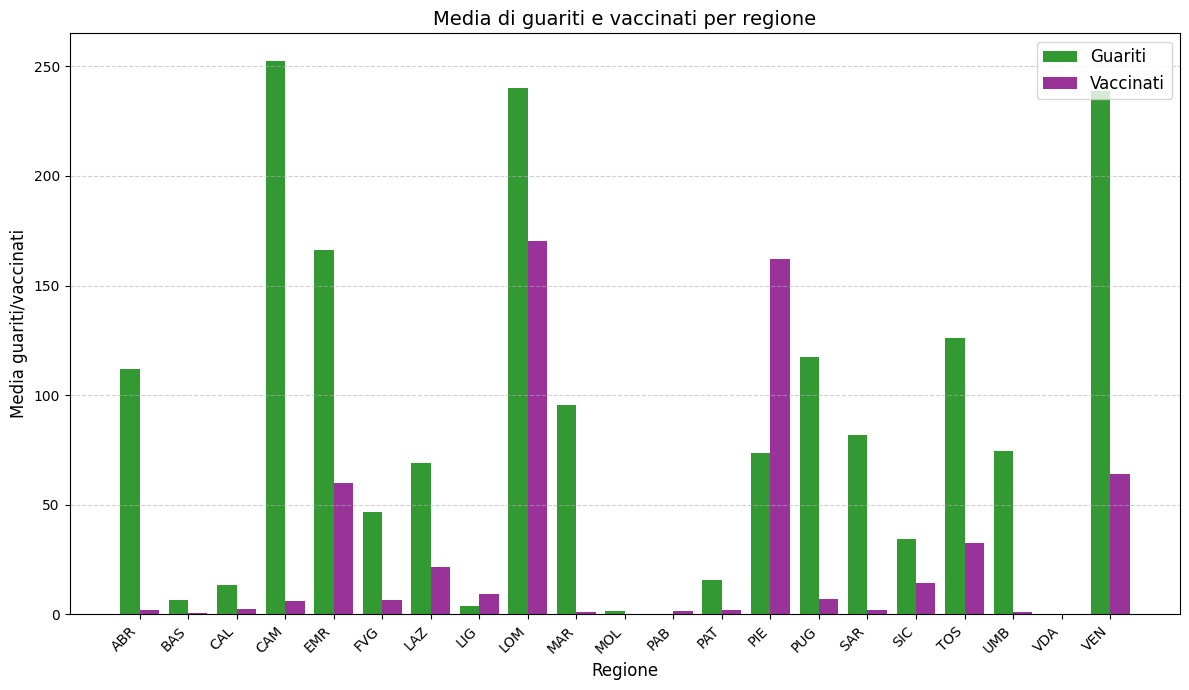

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv("copertura-vaccinale.csv", sep=",")

# Raggruppa i dati per regione e calcola la media di guariti e vaccinati
df_grouped = df.groupby('area')[['guariti', 'vaccinati']].mean().reset_index()

# Ordina le regioni alfabeticamente per un grafico più chiaro
df_grouped = df_grouped.sort_values('area')

# Estrai le sigle delle regioni
regioni = df_grouped['area']

# Posizioni sull'asse X
x = np.arange(len(regioni))

# Imposta la dimensione della figura
fig, ax = plt.subplots(figsize=(12, 7))

# Larghezza delle barre
width = 0.4  

# Disegna le barre
ax.bar(x - width/2, df_grouped['guariti'], width, color="green", label="Guariti", alpha=0.8)
ax.bar(x + width/2, df_grouped['vaccinati'], width, color="purple", label="Vaccinati", alpha=0.8)

# Imposta le etichette
ax.set_xlabel("Regione", fontsize=12)
ax.set_ylabel("Media guariti/vaccinati", fontsize=12)
ax.set_title("Media di guariti e vaccinati per regione", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(regioni, rotation=45, ha="right", fontsize=10)

# Aggiunge la legenda
ax.legend(loc="upper right", fontsize=12)

# Aggiunta di griglia orizzontale per facilitare la lettura
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# Migliora il layout
plt.tight_layout()
plt.show()


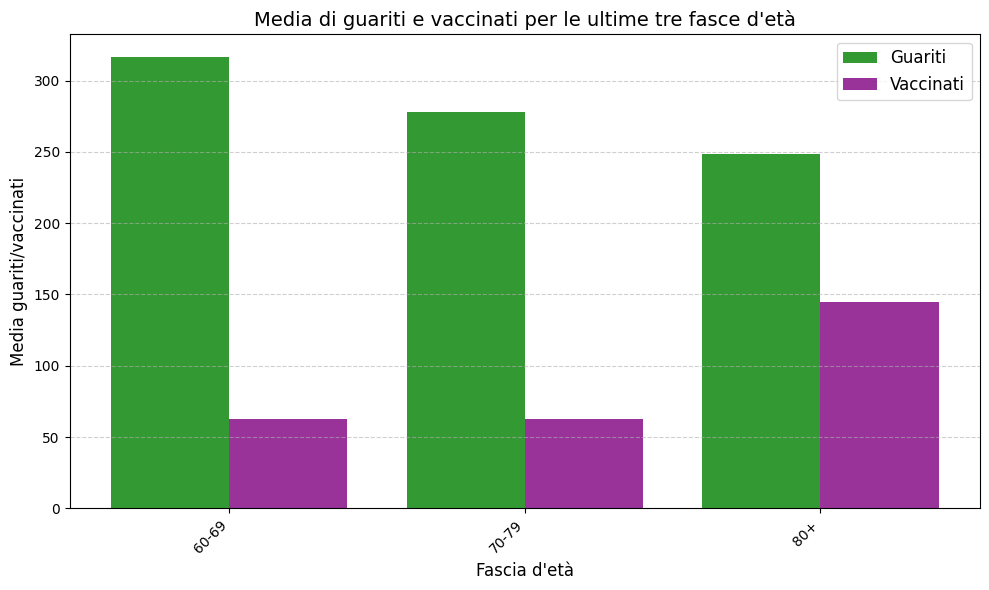

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv("copertura-vaccinale.csv", sep=",")

# Raggruppa i dati per fascia d'età e calcola la media di guariti e vaccinati
df_grouped = df.groupby('fascia_anagrafica')[['guariti', 'vaccinati']].mean().reset_index()

# Ordina le fasce d’età in ordine crescente
fasce_ordinate = sorted(df_grouped['fascia_anagrafica'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else 100) 
df_grouped = df_grouped.set_index('fascia_anagrafica').loc[fasce_ordinate].reset_index()

# Seleziona solo le ultime tre fasce d'età
df_grouped = df_grouped.tail(3)

# Posizioni sull'asse X
x = np.arange(len(df_grouped))

# Imposta la dimensione della figura
fig, ax = plt.subplots(figsize=(10, 6))

# Larghezza delle barre
width = 0.4  

# Disegna le barre
ax.bar(x - width/2, df_grouped['guariti'], width, color="green", label="Guariti", alpha=0.8)
ax.bar(x + width/2, df_grouped['vaccinati'], width, color="purple", label="Vaccinati", alpha=0.8)

# Imposta le etichette
ax.set_xlabel("Fascia d'età", fontsize=12)
ax.set_ylabel("Media guariti/vaccinati", fontsize=12)
ax.set_title("Media di guariti e vaccinati per le ultime tre fasce d'età", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_grouped['fascia_anagrafica'], rotation=45, ha="right", fontsize=10)

# Aggiunge la legenda
ax.legend(loc="upper right", fontsize=12)

# Aggiunta di griglia orizzontale per facilitare la lettura
ax.yaxis.grid(True, linestyle="--", alpha=0.6)

# Migliora il layout
plt.tight_layout()
plt.show()

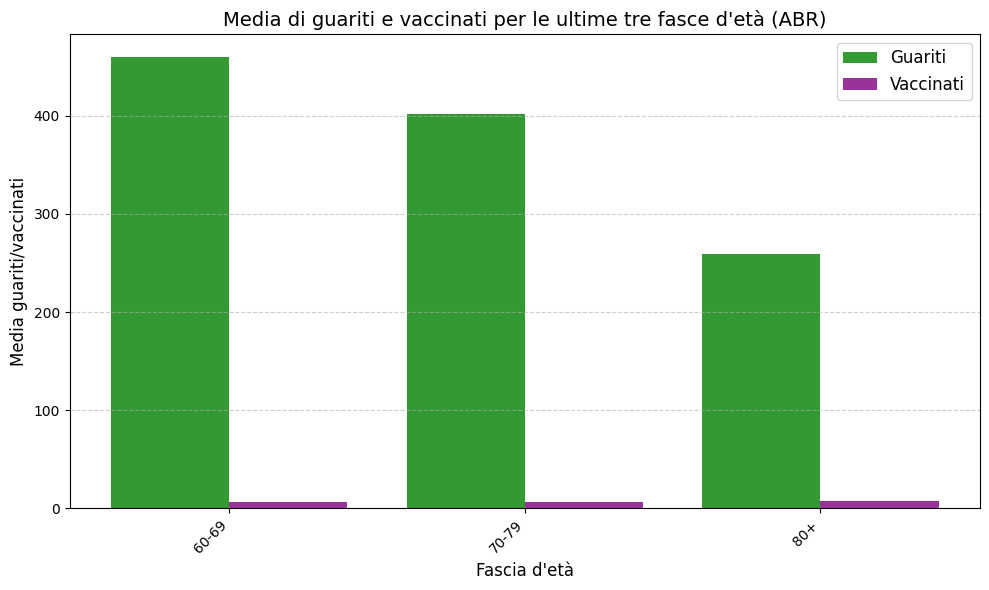

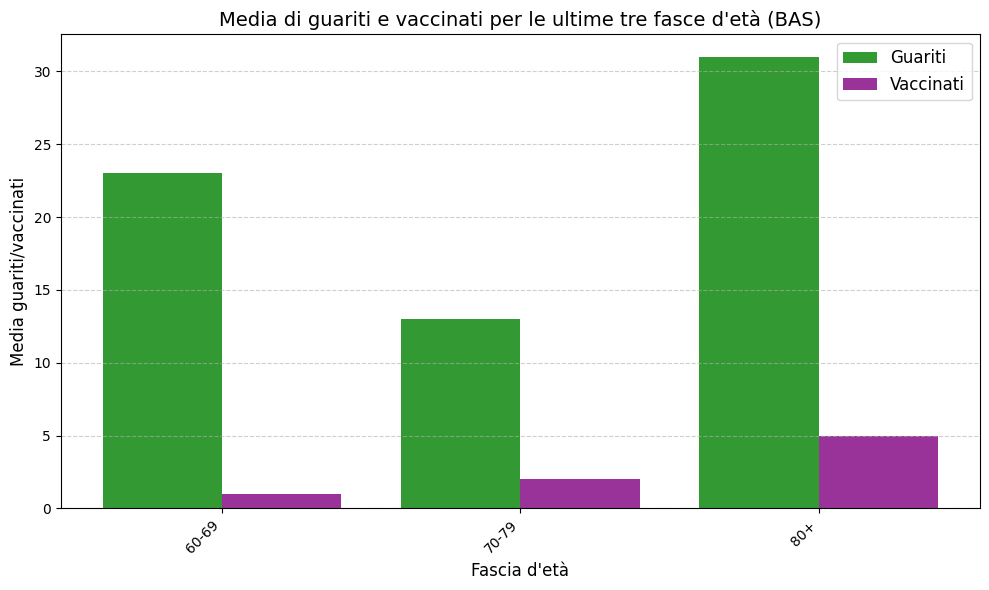

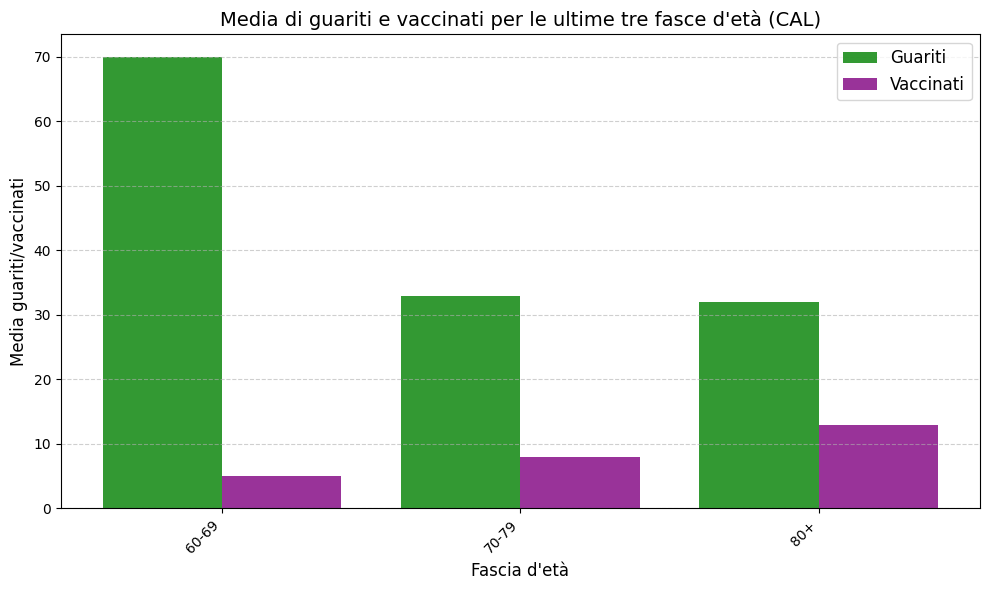

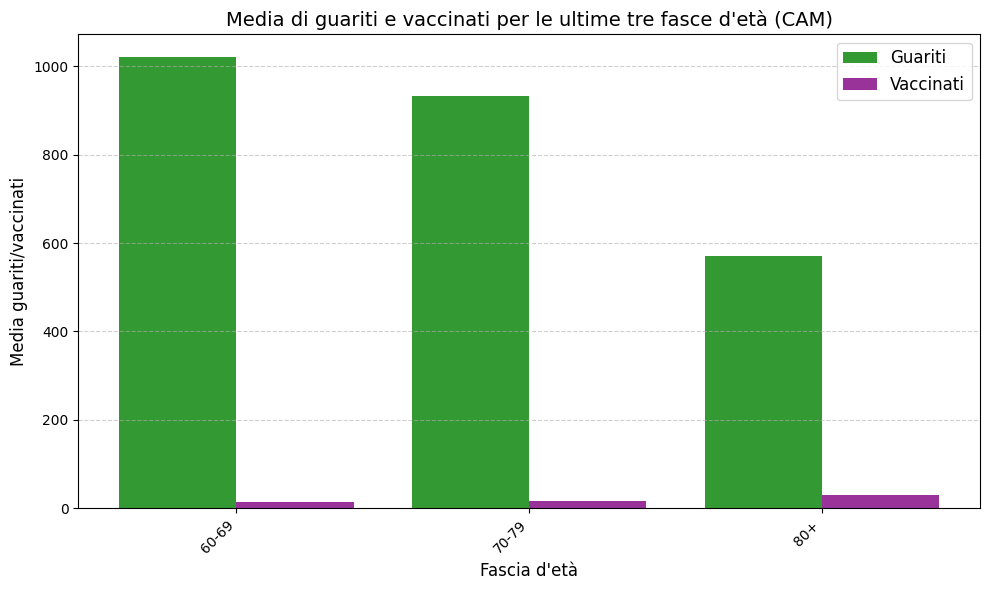

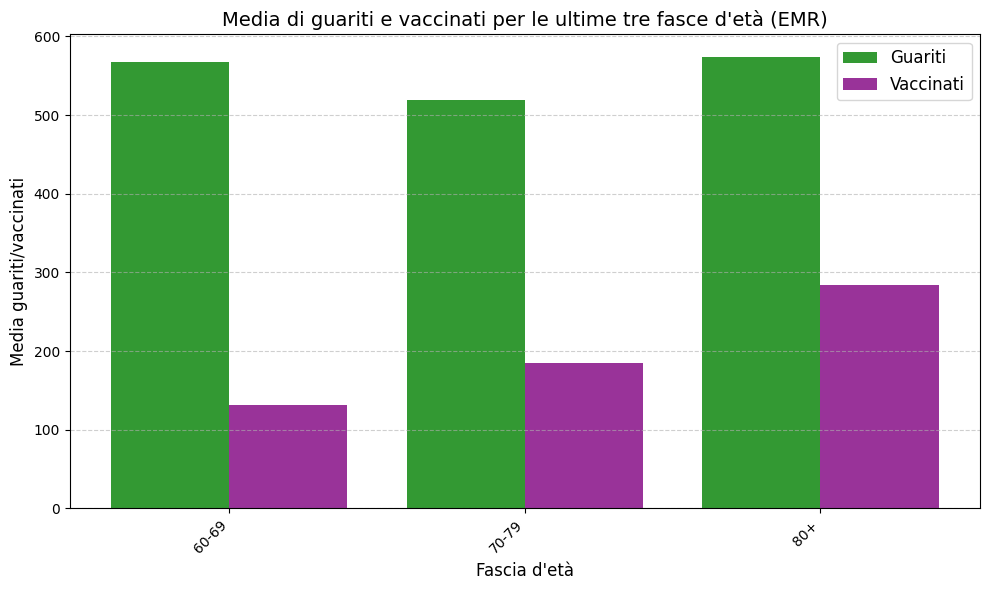

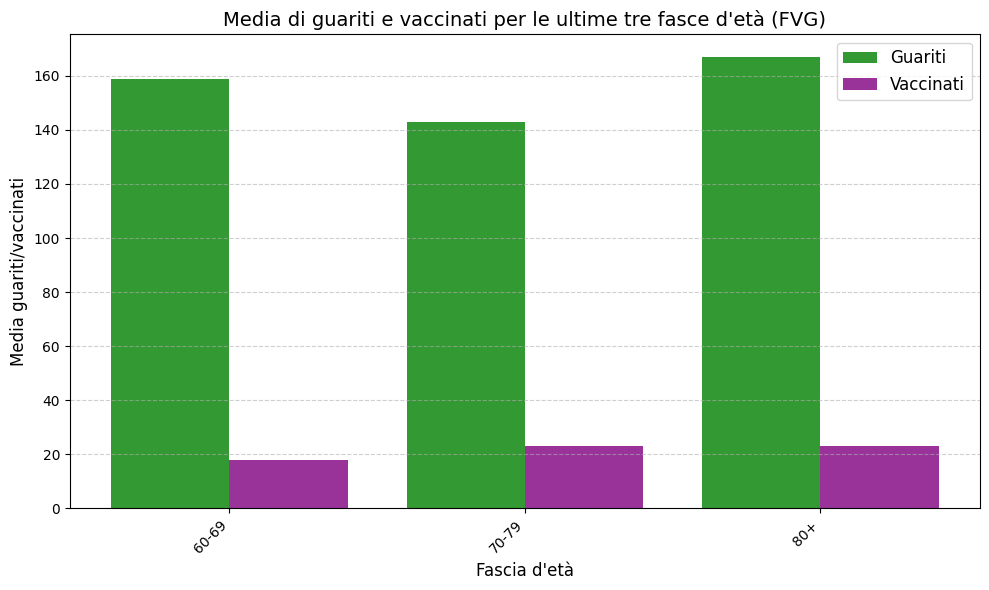

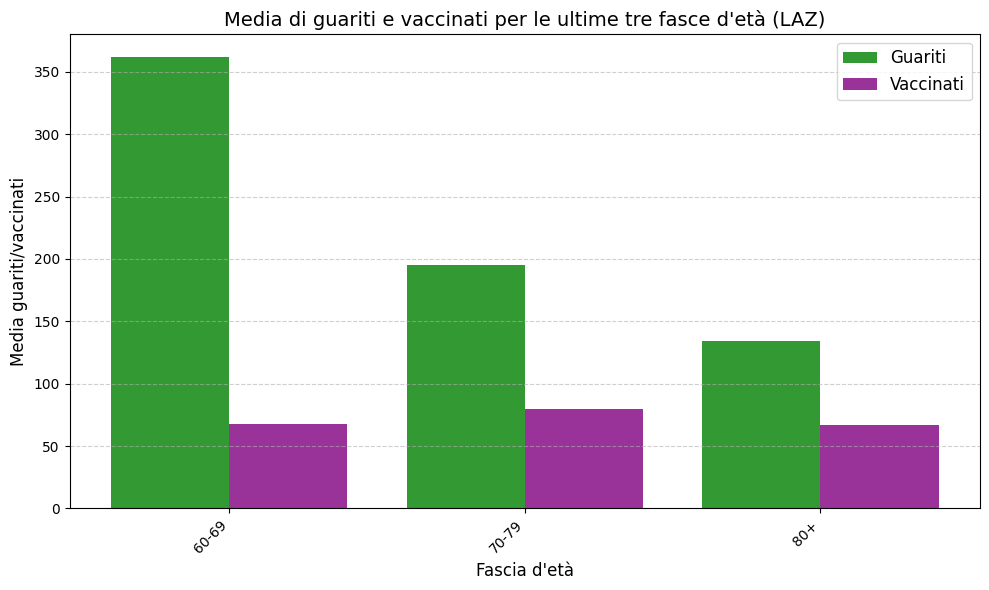

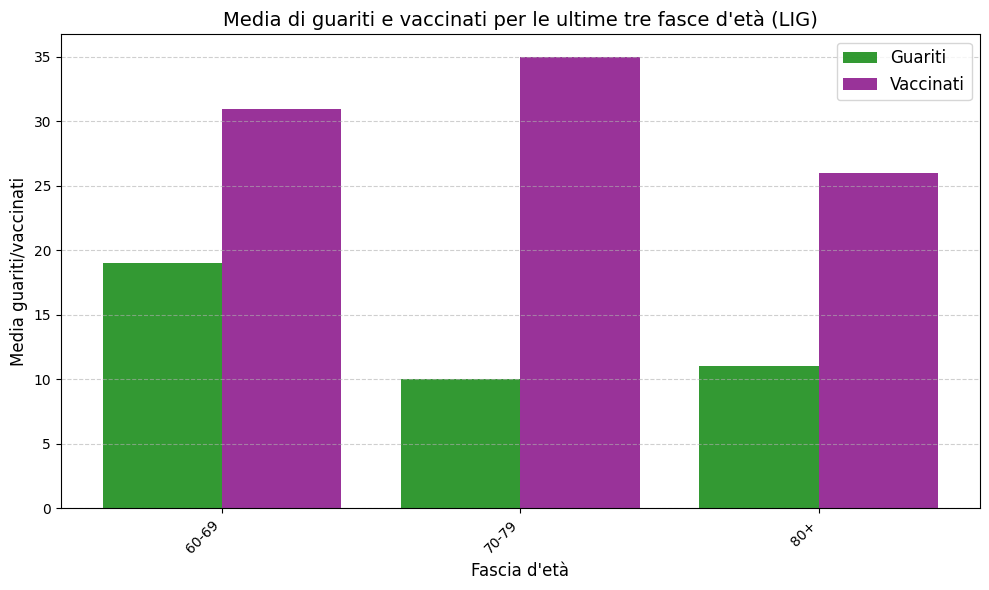

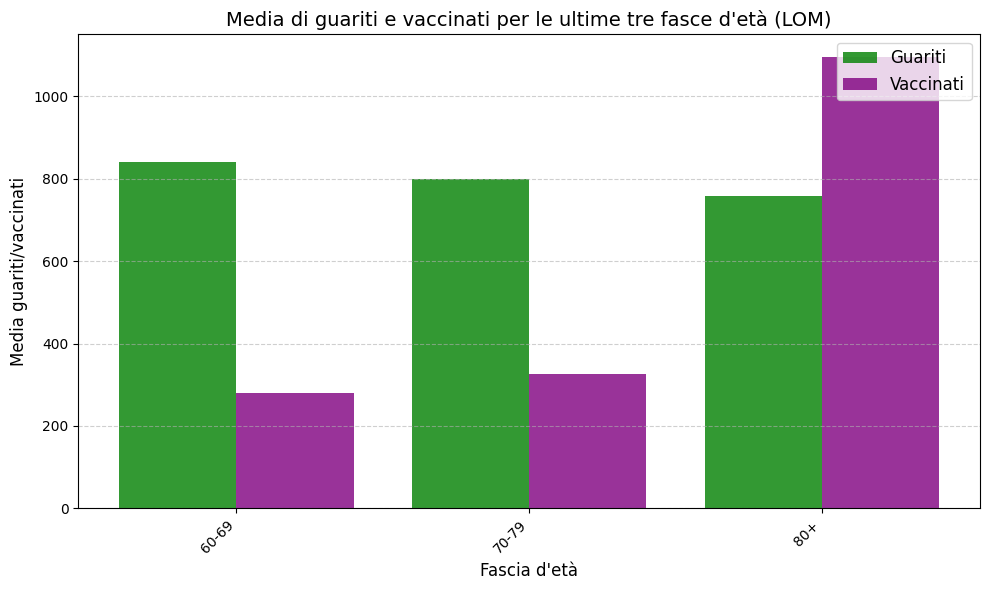

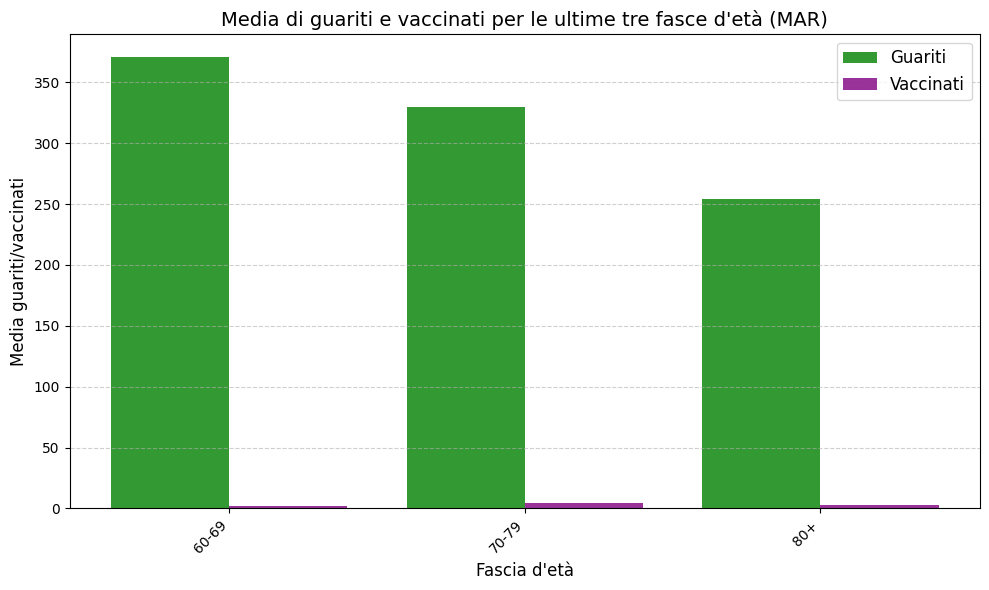

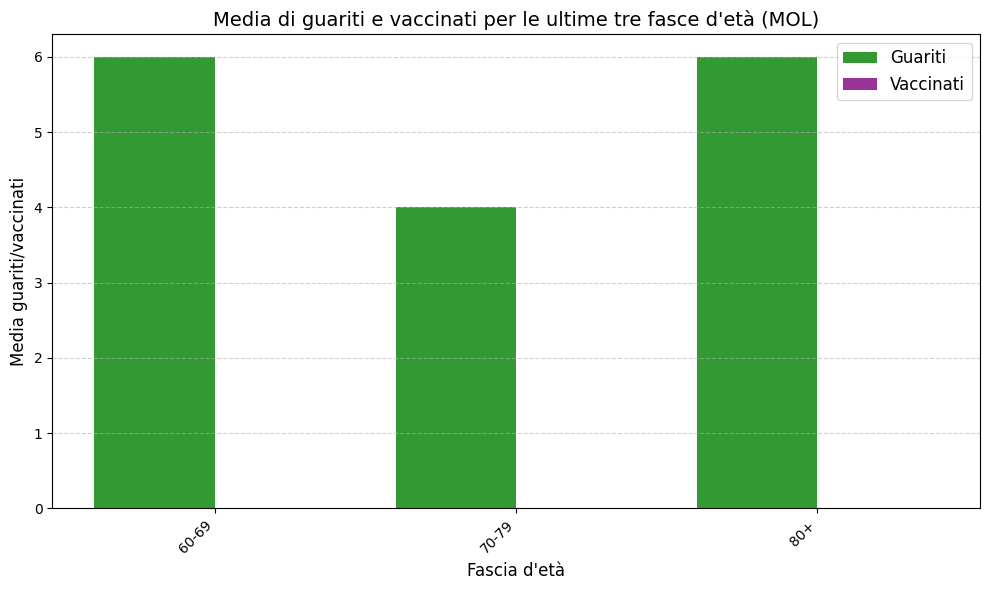

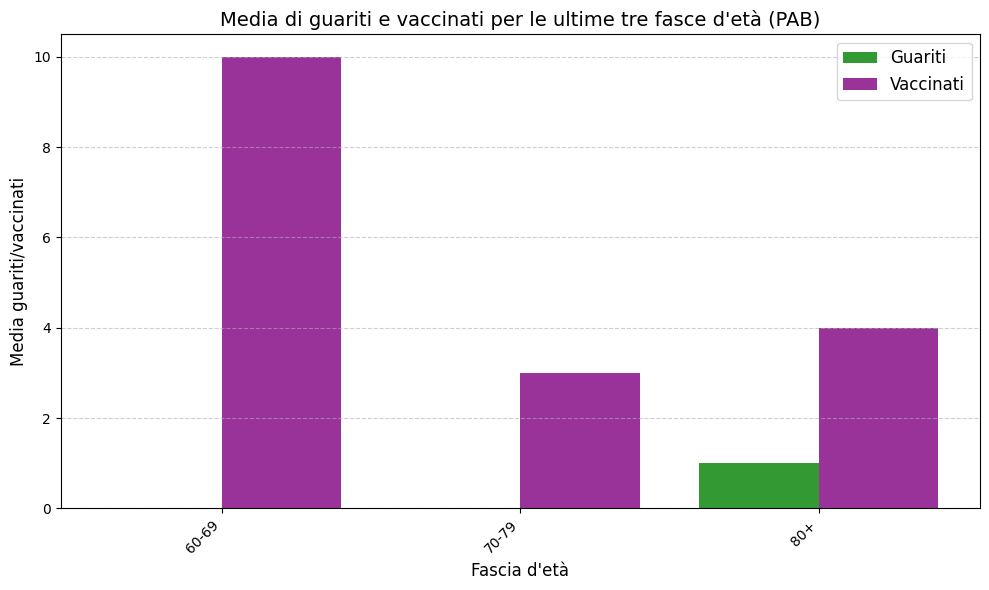

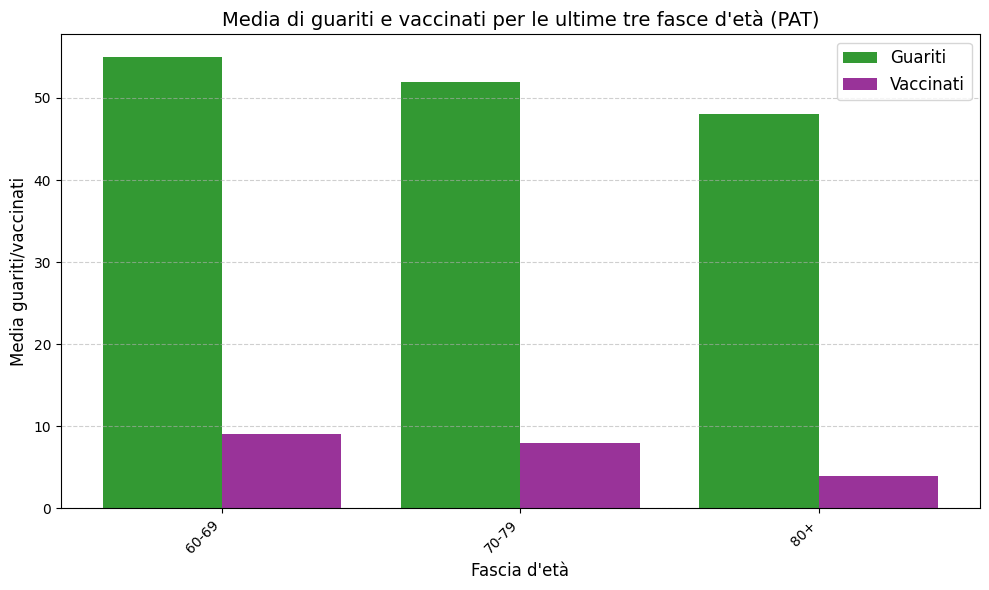

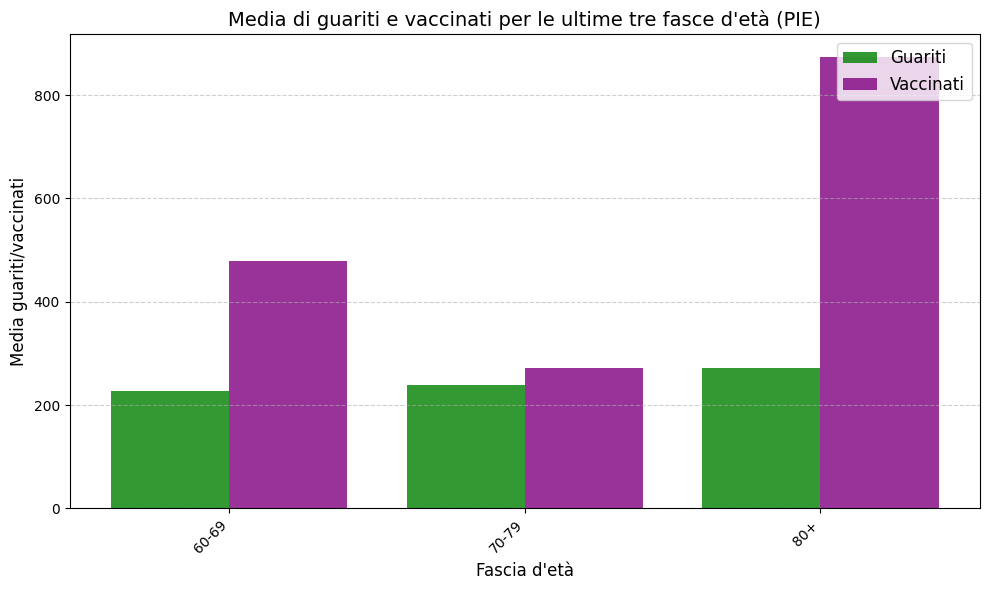

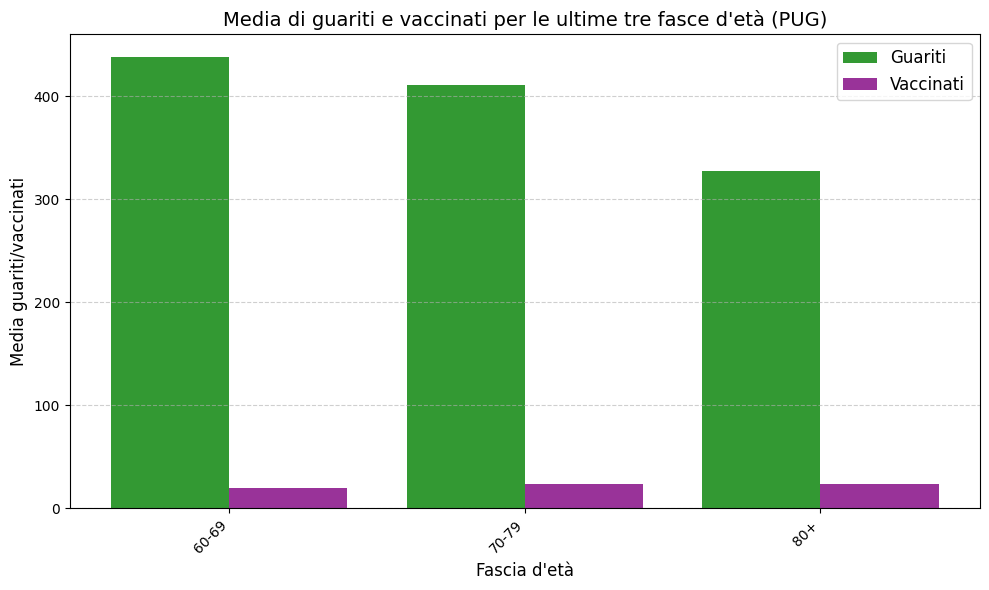

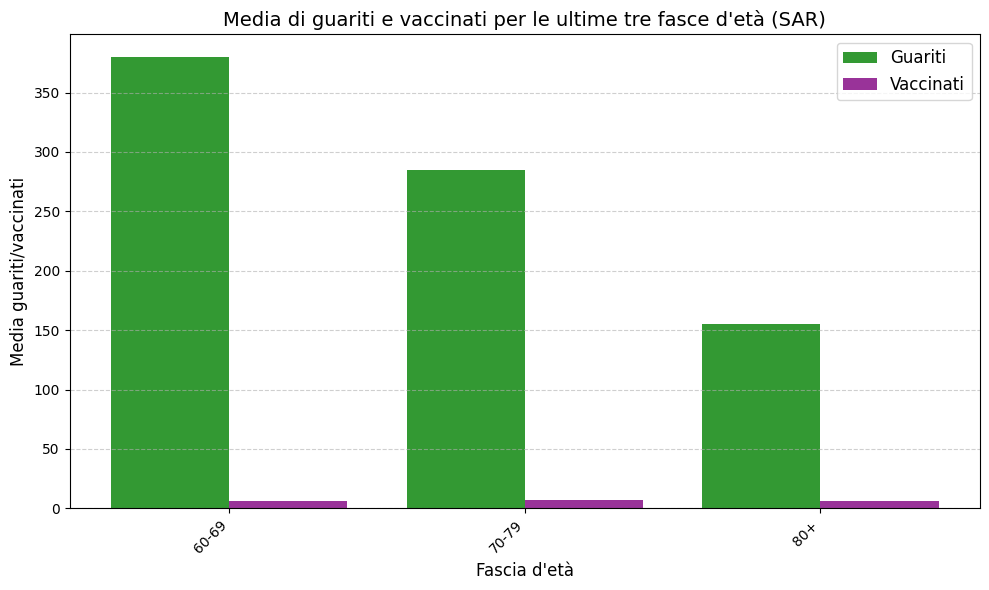

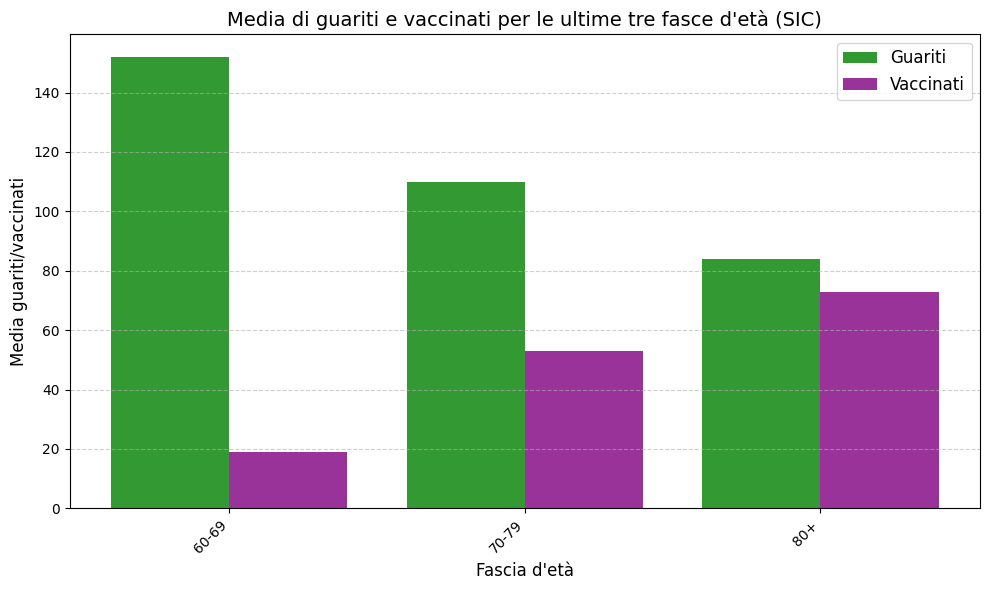

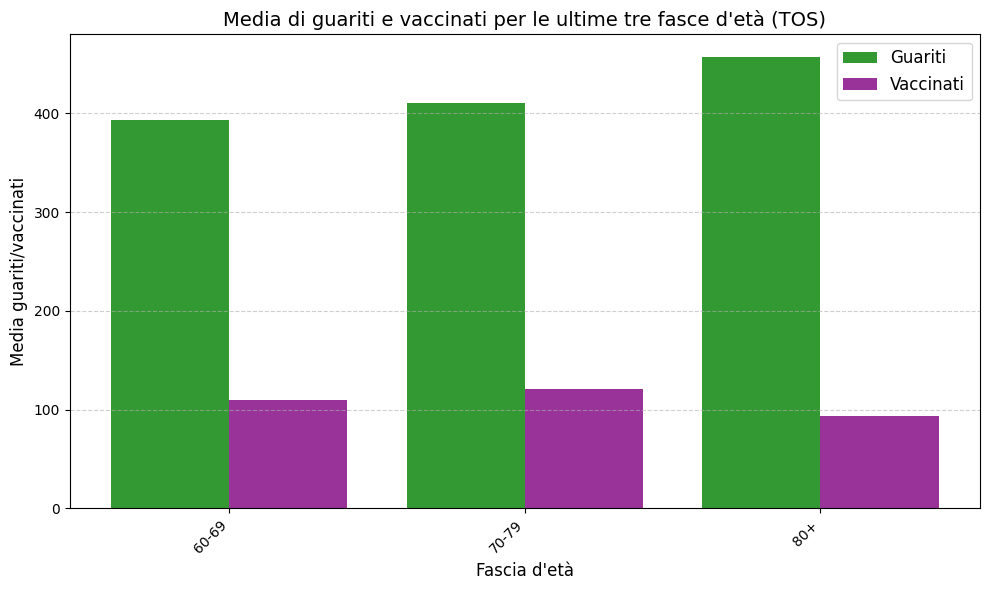

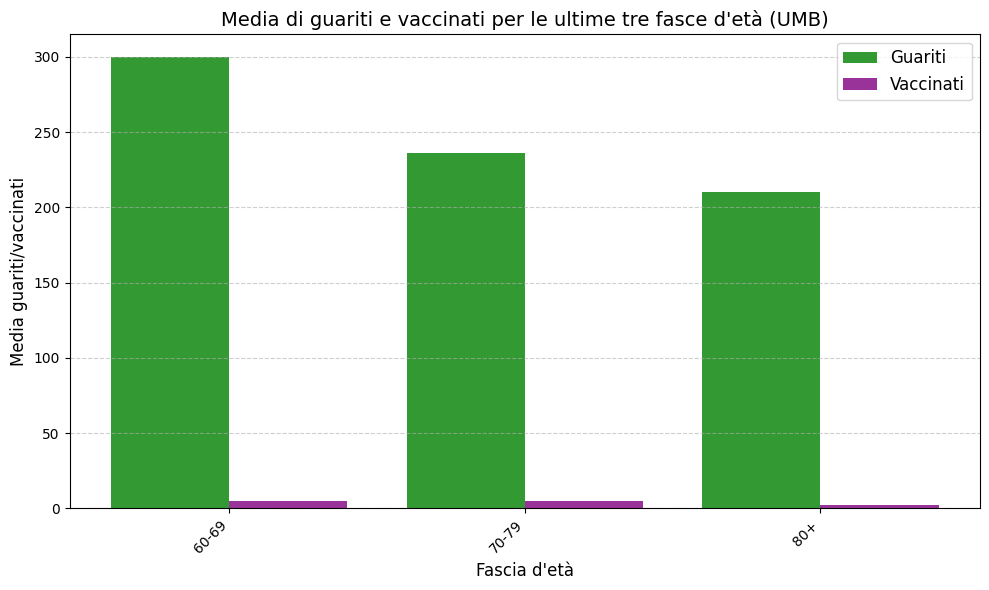

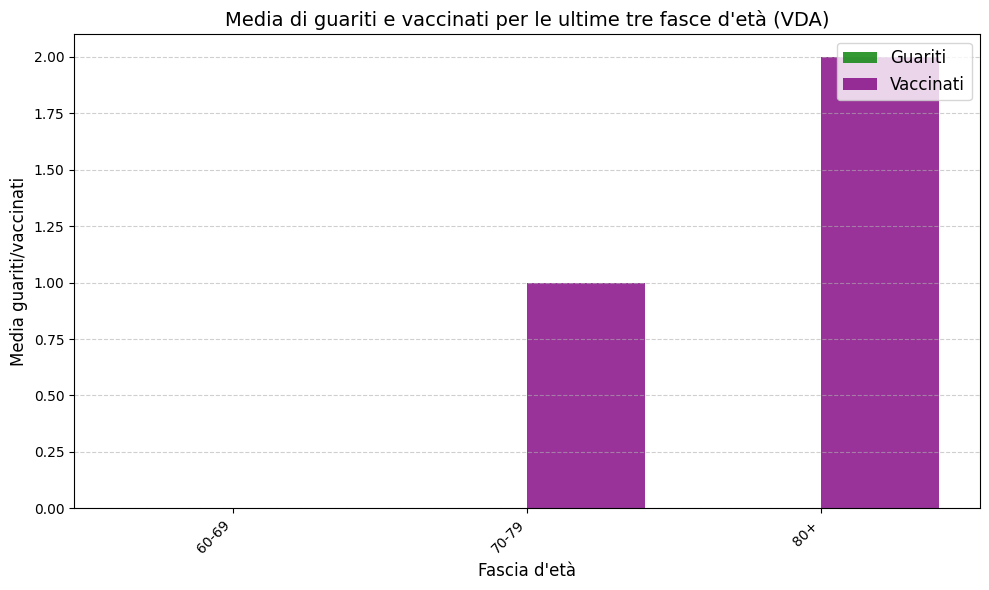

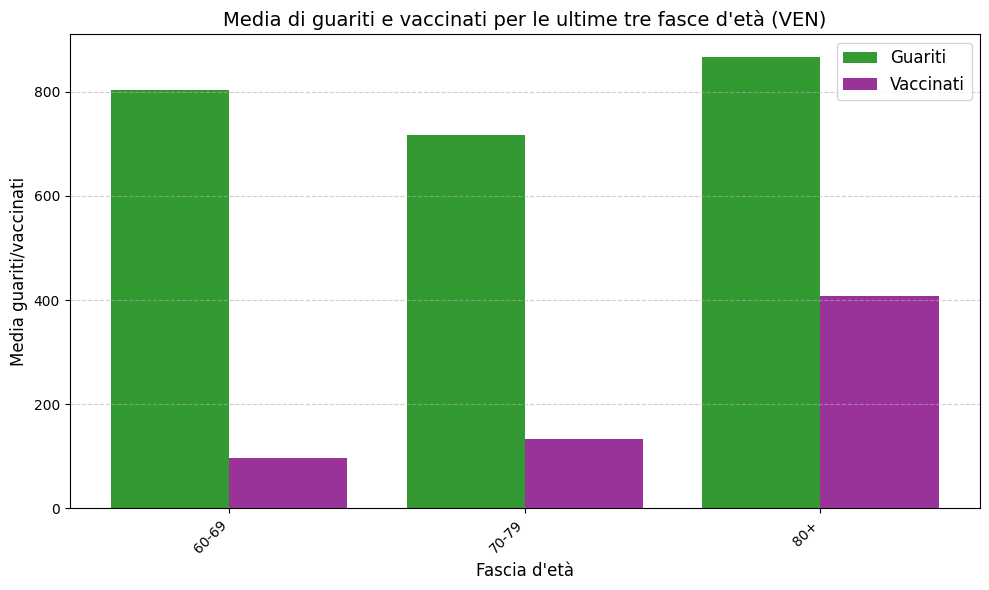

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv("copertura-vaccinale.csv", sep=",")

# Ottieni le ultime tre fasce d'età in ordine crescente
fasce_ordinate = sorted(df['fascia_anagrafica'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else 100)
ultime_fasce = fasce_ordinate[-3:]

# Filtra il dataframe per includere solo le ultime tre fasce
df = df[df['fascia_anagrafica'].isin(ultime_fasce)]

# Ottieni la lista delle regioni
regioni = df['area'].unique()

# Creazione di un grafico per ogni regione
for regione in regioni:
    df_regione = df[df['area'] == regione]
    
    # Calcola la media di guariti e vaccinati per fascia d'età
    df_grouped = df_regione.groupby('fascia_anagrafica')[['guariti', 'vaccinati']].mean().reset_index()
    
    # Ordina le fasce d'età correttamente
    df_grouped = df_grouped.set_index('fascia_anagrafica').loc[ultime_fasce].reset_index()
    
    # Posizioni sull'asse X
    x = np.arange(len(df_grouped))

    # Creazione della figura
    fig, ax = plt.subplots(figsize=(10, 6))

    # Larghezza delle barre
    width = 0.4  

    # Disegna le barre per guariti e vaccinati
    ax.bar(x - width/2, df_grouped['guariti'], width, color="green", label="Guariti", alpha=0.8)
    ax.bar(x + width/2, df_grouped['vaccinati'], width, color="purple", label="Vaccinati", alpha=0.8)

    # Imposta etichette e titolo
    ax.set_xlabel("Fascia d'età", fontsize=12)
    ax.set_ylabel("Media guariti/vaccinati", fontsize=12)
    ax.set_title(f"Media di guariti e vaccinati per le ultime tre fasce d'età ({regione})", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(df_grouped['fascia_anagrafica'], rotation=45, ha="right", fontsize=10)

    # Aggiunge la legenda
    ax.legend(loc="upper right", fontsize=12)

    # Aggiunge griglia per migliorare la leggibilità
    ax.yaxis.grid(True, linestyle="--", alpha=0.6)

    # Ottimizza il layout
    plt.tight_layout()

    # Mostra il grafico per la regione corrente
    plt.show()
